# 5. Geospatial python

Because of the wide array (pun intended) of open source data science modules that are accessible with python, it has emerged as a flagship language for processing, analyzing, and visualizing geospatial data. There are several key geospatial packages available in python: 

* [Geopandas](https://geopandas.org/en/stable/) - processing vector data (e.g. shapfiles, `.GeoJSON`, `.KML`, see [here](https://gdal.org/en/stable/drivers/vector/index.html) for a full list of geospatial vector filetypes)
* [Rasterio](https://rasterio.readthedocs.io/en/stable/) - processing raster data (e.g. satellite imagery in `.tif` or `.tiff` format)
* [Xarray](https://docs.xarray.dev/) - multidimensional array analysis (e.g. time series gridded or satellite datasets in `.nc` or `.hdf` format)
* [GDAL](https://gdal.org/) - the key library (originally written in C and C++) that underscores most of the raster and vector processing operations in the above libraries, as well as GUI-based GIS software (ArcMap, QGIS, Google Earth/Maps, etc)

We will begin with (1) an (abridged) overview of map projections and coordinate systems, and (2) a brief discussion of the two fundamental types of geospatial data to motivate the topic.

## Coordinate Systems and Projections

A [coordinate system](https://en.wikipedia.org/wiki/Spatial_reference_system) is a framework used to determine position on the surface of the earth. Coordinate Systems are practical solutions to the challenge of depicting a 3D object (the earth) on a 2D surface (a screen).

Example of a coordinate system for a 2-D plane is the Cartesian Coordinate System (i.e. X and Y) 

You've probably seen the Geographic Coordinate System (GCS), the three-dimensional coordinate system commonly used to define locations on the earth’s surface.
* The unit of measure in the GCS is **degrees**, 
* locations are defined by **latitude and longitude** 

A [Map Projection](https://en.wikipedia.org/wiki/Map_projection) is how we transform geographic data from a three-dimensional, spherical coordinate system to a two-dimensional planar system. Map projections introduce distortions in distance, direction, and area. They are useful to convert data with units of degrees (in a GCS) into more practical length units such as meters or feet. There are several types of [projected coordinate systems](https://en.wikipedia.org/wiki/Projected_coordinate_system) and projection types that can be used, the most common being: 
* Planar
* Conical
* Cylindrical

![projections](./img/5-projections.jpg)


## Vector and Raster data

Geospatial data can be broadly categorized as either Vector or Raster:

### [Vector](https://en.wikipedia.org/wiki/Vector_graphics)
* Vector data consit of points, lines, and polygons
* Stored as tabular data files with geographic metadata
* Lines are made up of points, have a starting and ending point
* Polygons are made up of points, and the starting point = the ending point.
* Can have a topology, or an organizational scheme to e.g. dictate the order or direction of data

### [Raster](https://en.wikipedia.org/wiki/Raster_graphics)
* Raster data consist of grids of numbers - 'Raster' means 'screen' in Latin
* Can contain multiple channels / bands - a true color image has Red, Green, Blue channels 
* The [Spatial Resolution](https://en.wikipedia.org/wiki/Image_resolution) of a raster image refers to the size of a pixel (e.g. 1mm, 1cm, or 1m)
* Satellite / drone / camera data is natively raster

The below image shows vector data on the left, and raster data on the right: 
![vec-ras](./img/5-vec-ras.jpg)

Now that we have some foundational Geospatial knowledge under our belt, let's cover some of the python tools that we can use to process, analyze, and visualize geospatial data: 

## Geopandas

Remember `pandas` from last module? Enter `geopandas` - a natural geospatial extension to store tabular vector data (think points, lines, and polygons) and simplify operations by keeping with pandas-like syntax. 

Let's load the same `stations.csv` file and convert it from a `pandas.DataFrame` to a `geopandas.GeoDataFrame`:

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/py4wrds/py4wrds/refs/heads/module-4/data/gwl/stations.csv"
df = pd.read_csv(url)

In [3]:
df.head()

STN_ID           SITE_CODE            SWN  WELL_NAME  LATITUDE  LONGITUDE  \
0   51445  320000N1140000W001            NaN  Bay Ridge   35.5604   -121.755   
1   25067  325450N1171061W001  19S02W05K003S        NaN   32.5450   -117.106   
2   25068  325450N1171061W002  19S02W05K004S        NaN   32.5450   -117.106   
3   39833  325450N1171061W003  19S02W05K005S        NaN   32.5450   -117.106   
4   25069  325450N1171061W004  19S02W05K006S        NaN   32.5450   -117.106   

  WLM_METHOD  WLM_ACC BASIN_CODE                  BASIN_NAME COUNTY_NAME  \
0  USGS quad  Unknown        NaN                         NaN    Monterey   
1    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
2    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
3    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
4    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   

   WELL_DEPTH     WELL_USE                               WELL_TYPE WCR_NO  \
0         NaN  Residential  Part of a nested/multi-completion well    NaN   
1         NaN      Unknown                                 Unknown    NaN   
2         NaN      Unknown                                 Unknown    NaN   
3         NaN      Unknown                                 Unknown    NaN   
4         NaN      Unknown                                 Unknown    NaN   

   ZIP_CODE  
0     92154  
1     92154  
2     92154  
3     92154  
4     92154

In [4]:
# Create a GeoDataFrame from the DataFrame

import geopandas as gpd

gdf_stns = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["LONGITUDE"], df["LATITUDE"]),
    crs="EPSG:4326",  # Set the coordinate reference system (CRS) - more on this later
)

`GeoDataFrame` objects are a subclass of `pandas.DataFrame`, so you can use all of the same methods. In fact, a `GeoDataFrame` is just a `pandas.DataFrame` with a single extra column (geometry) and some extra features that make use of that column.

`plot()` is a special geopandas method that will plot the geometry / latlon of the df:


<Axes: >

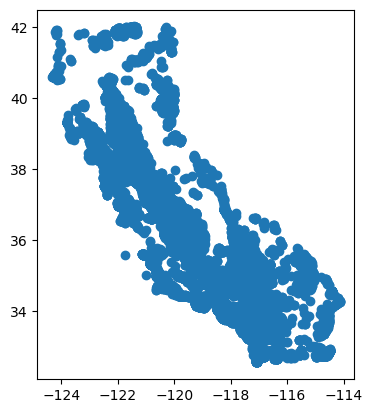

In [5]:
# Plot our results:
gdf_stns.plot()

When printed, the tabular data is identical, and all `pandas`-like syntax can be used to sort and filter data:

['Monterey' 'San Diego' 'Imperial' 'Riverside' 'Orange' 'Kern'
 'Los Angeles' 'San Bernardino' 'Ventura' 'Santa Barbara' 'Alameda'
 'San Luis Obispo' 'Amador' 'Alpine' 'Tulare' 'Inyo' 'Fresno' 'Kings'
 'Merced' 'San Benito' 'San Joaquin' 'Glenn' 'Madera' 'Santa Cruz'
 'Santa Clara' 'Plumas' 'Stanislaus' 'San Mateo' 'Mono' 'Mariposa'
 'San Francisco' 'Contra Costa' 'Tuolumne' 'Marin' 'Calaveras' 'Sonoma'
 'Sacramento' 'Sutter' 'Solano' 'Napa' 'Placer' 'Yolo' 'Lake' 'Colusa'
 'El Dorado' 'Mendocino' 'Yuba' 'Butte' 'Nevada' 'Sierra' 'Lassen'
 'Tehama' 'Shasta' 'Humboldt' 'Modoc' 'Siskiyou' 'Del Norte' 'Klamath, OR']


<Axes: >

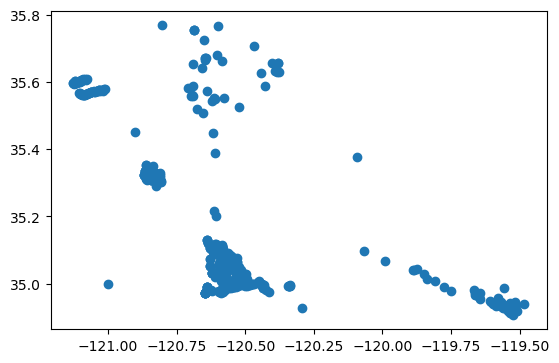

In [6]:
# Get unique county names
print(gdf_stns["COUNTY_NAME"].unique())
# Plotting all stations in SLO county only
gdf_stns[gdf_stns["COUNTY_NAME"] == "San Luis Obispo"].plot()

### Reading and writing vector files

Geopandas excels at making it easy to read and write vector files of several formats, which facilitates conversions and interoperability. 

Simply `import geopandas as gpd` and then read any common vector file format with the `gpd.read_file('filename')` function, which works for common formats such as `.shp` (and supporting `.dbf` and `.shx` files), `kml`, `kmz`, `geojson`, etc..

In [7]:
# Read a geojson file
url = "https://raw.githubusercontent.com/scottpham/california-counties/refs/heads/master/caCountiesTopo.json"
gdf_counties = gpd.read_file(url)
gdf_counties.head()

id           name              fullName    areaLand  \
0  06091         Sierra         Sierra County  2468686345   
1  06067     Sacramento     Sacramento County  2499176690   
2  06083  Santa Barbara  Santa Barbara County  7083926262   
3  06009      Calaveras      Calaveras County  2641819811   
4  06111        Ventura        Ventura County  4773381212   

                                            geometry  
0  POLYGON ((-120.14666 39.70738, -120.13527 39.7...  
1  POLYGON ((-121.14147 38.7118, -121.14043 38.71...  
2  MULTIPOLYGON (((-119.46758 34.06296, -119.4862...  
3  POLYGON ((-120.07212 38.50985, -120.07212 38.5...  
4  MULTIPOLYGON (((-119.63631 33.27314, -119.6363...

<Axes: >

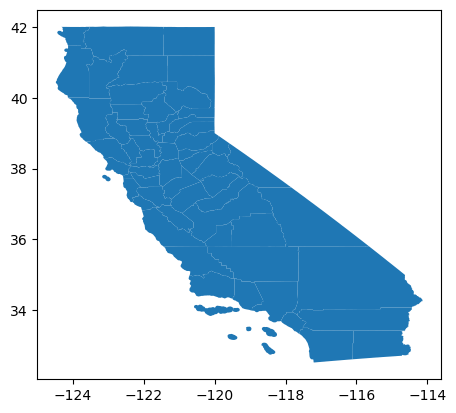

In [8]:
gdf_counties.plot()

To write files, simply use the syntax: `gdf.to_file("path/to/out_file.geojson")` syntax. We recommend storing files as `.geojson` due to readability and simplicity to store and retrieve. 

In [9]:
gdf_counties.to_file("ca_counties.geojson")

/Users/aakashahamed/anaconda3/envs/py4wrds/lib/python3.13/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


We received a warning that our CRS was not defined. We can eliminate this warning by defining the geographic WGS 84 [coordinate reference system](https://en.wikipedia.org/wiki/Spatial_reference_system) (CRS) through its EPSG code using `gdf.set_crs('epsg:4236')`. 

Similar to other `DataFrame` and `pandas` operations, we must specify the `inplace = True` argument: 

In [10]:
gdf_counties.set_crs("epsg:4326", inplace=True)
gdf_counties.to_file("ca_counties.geojson")

In [11]:
# verify that file was written in our current directory:
import os

[x for x in os.listdir(os.getcwd()) if "geojson" in x]

['ca_counties.geojson']

We can inspect the coordinate reference system by using the `gdf.crs` syntax: 

In [12]:
# Geographic CRS example:
gdf_stns.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Reprojections

Often, we'll want to change the coordinate system of some data. This can be achieved through **reprojection**. 

##### UTM zones:

Universal Transverse Mercator (UTM) is often an appropriate coordinate system for measuring distances, areas, etc
* Units in meters, expressed in Easting / Northing 

UTM coordinate systems 

Let's reproject the geodataframe into a projected CRS for California - UTM Zone 10 N, which is `epsg:32611`: 

In [13]:
gdf_rpj = gdf_stns.to_crs("epsg:32611")
gdf_rpj.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

the `estimate_utm_crs()` function may be convenient for going between geographic and projected CRS:

In [14]:
gdf_stns.estimate_utm_crs()

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Geometric Operations

We can easily calculate geometry properties such as area, centroids, bounds, and distances using geopandas.

Recall that one of our datasets consists of points (`gdf_stns`), and the other consists of polygons (`gdf_counties`)

#### Calculating Areas

In [15]:
# Calculate area for each polygon in a UTM CRS
# Note - the units depend on the coordinate system,
# Be sure to reproject appropriately and perform conversions

gdf_rpj["area_sqkm"] = gdf_rpj.area * 1e-6  # Sq m to sq km

In [16]:
gdf_rpj.head()

STN_ID           SITE_CODE            SWN  WELL_NAME  LATITUDE  LONGITUDE  \
0   51445  320000N1140000W001            NaN  Bay Ridge   35.5604   -121.755   
1   25067  325450N1171061W001  19S02W05K003S        NaN   32.5450   -117.106   
2   25068  325450N1171061W002  19S02W05K004S        NaN   32.5450   -117.106   
3   39833  325450N1171061W003  19S02W05K005S        NaN   32.5450   -117.106   
4   25069  325450N1171061W004  19S02W05K006S        NaN   32.5450   -117.106   

  WLM_METHOD  WLM_ACC BASIN_CODE                  BASIN_NAME COUNTY_NAME  \
0  USGS quad  Unknown        NaN                         NaN    Monterey   
1    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
2    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
3    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   
4    Unknown  Unknown      9-033  Coastal Plain Of San Diego   San Diego   

   WELL_DEPTH     WELL_USE                               WELL_TYPE WCR_NO  \
0         NaN  Residential  Part of a nested/multi-completion well    NaN   
1         NaN      Unknown                                 Unknown    NaN   
2         NaN      Unknown                                 Unknown    NaN   
3         NaN      Unknown                                 Unknown    NaN   
4         NaN      Unknown                                 Unknown    NaN   

   ZIP_CODE                       geometry  area_sqkm  
0     92154  POINT (68916.162 3945609.103)        0.0  
1     92154  POINT (490047.407 3600852.39)        0.0  
2     92154  POINT (490047.407 3600852.39)        0.0  
3     92154  POINT (490047.407 3600852.39)        0.0  
4     92154  POINT (490047.407 3600852.39)        0.0

#### Centroids

The [centroid](https://en.wikipedia.org/wiki/Centroid) is the geographic center point of a polygon (i.e. the mean of all the points that make up its surface)

Calculating centroids can be done with the `gdf.centroid` function:

0      POINT (-120.5159 39.5804)
1    POINT (-121.34431 38.44933)
2    POINT (-120.03075 34.53832)
3    POINT (-120.55404 38.20466)
4    POINT (-119.12598 34.35742)
dtype: geometry


/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_25758/3389763898.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(gdf_counties.centroid.head())
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_25758/3389763898.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties.centroid.plot()


<Axes: >

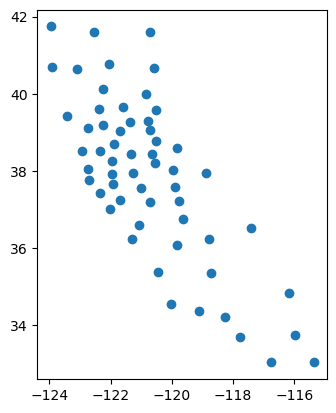

In [17]:
print(gdf_counties.centroid.head())
gdf_counties.centroid.plot()

the `alpha` keyword here gives a transparency to the plotted points with `0` being fully transparent and `1` being fully opaque

#### Boundaries

Similarly, boundaries can be obtained with the `gdf.boundary` function: 

0    LINESTRING (-120.14666 39.70738, -120.13527 39...
1    LINESTRING (-121.14147 38.7118, -121.14043 38....
2    MULTILINESTRING ((-119.46758 34.06296, -119.48...
3    LINESTRING (-120.07212 38.50985, -120.07212 38...
4    MULTILINESTRING ((-119.63631 33.27314, -119.63...
dtype: geometry


<Axes: >

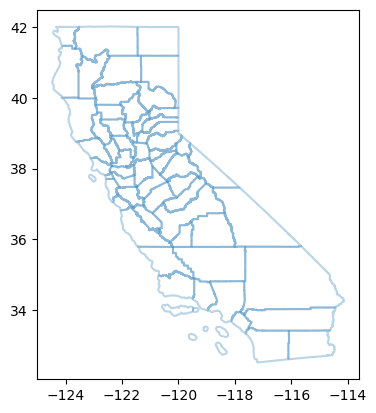

In [18]:
# Get the boundary of each polygon
print(gdf_counties.boundary.head())
gdf_counties.boundary.plot(alpha=0.3)

#### Distances

Similarly, distances between two points can be computed with the `distance` function: 

Let's calculate the distance between each of the stations in our dataset

<Axes: >

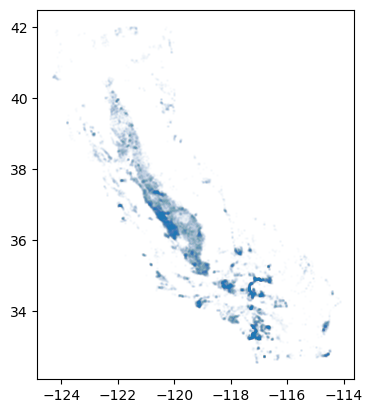

In [19]:
gdf_stns.plot(markersize=1, alpha=0.01)

In [20]:
# Reproject to UTM zone 11N
gdf_stns.to_crs(gdf_stns.estimate_utm_crs(), inplace=True)

# calculate distance between the first station and each of the other stations
gdf_stns["dist_from_stn_1"] = gdf_stns.distance(gdf_stns.iloc[0].geometry)

Text(0.5, 1.0, 'dist (m) from 0th station')

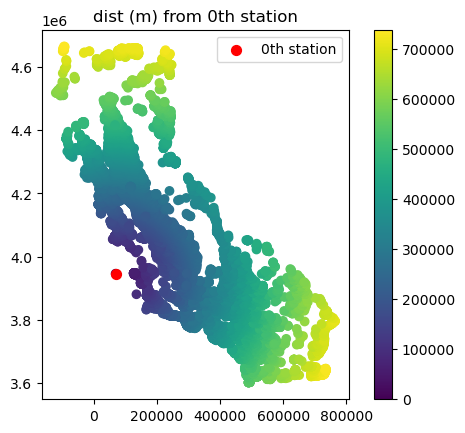

In [21]:
# Plot stations, colored by distance
ax = gdf_stns.plot(column="dist_from_stn_1", legend=True)
# Plot the first station in red
gdf_stns.loc[[0], "geometry"].plot(markersize=50, color="red", ax=ax, label="0th station")
# add a legend a title
ax.legend()
ax.set_title("dist (m) from 0th station")

### Plotting 

Just above we see an example of how to color a `GeoDataFrame` by a column, by specifying the `column = 'column_name'` argument into `gdf.plot()`. 

We can create interactive plots with the `gdf.explore()` funtion: 

In [22]:
gdf_slo = gdf_stns[gdf_stns["COUNTY_NAME"] == "San Luis Obispo"]

gdf_slo.explore(legend=False)

### Spatial Operations 

Geopandas makes it easy to perform basic spatial operations such as Buffers, Convex Hull, and Spatial Joins

#### Buffer

<Axes: >

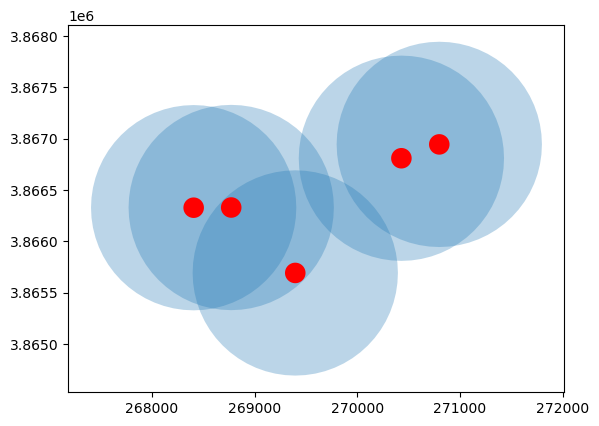

In [23]:
# Apply a 1000m buffer to the first 5 points in the SLO well data
ax = gdf_slo[:5].buffer(1000).plot(alpha=0.3)
# Plot the same 5 but with a smaller (100m) buffer
gdf_slo[:5].buffer(100).plot(ax=ax, color="red")

#### Convex Hull

A [convex hull](https://en.wikipedia.org/wiki/Convex_hull) gives the minimum bounds (as polygon) to enclose a number of points or another polygon's points. 

Text(0.5, 1.0, 'Convex Hull of CA Counties')

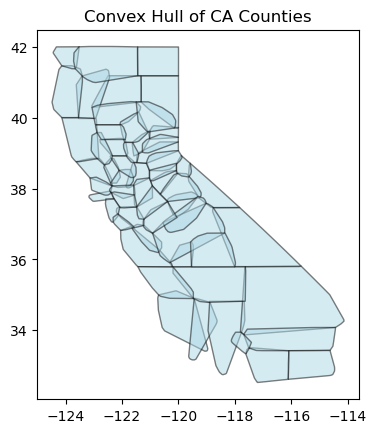

In [24]:
gdf_counties["convex_hull"] = gdf_counties.convex_hull
# Plot the convex hulls
ax = gdf_counties["convex_hull"].plot(alpha=0.5, color="lightblue", edgecolor="black")
ax.set_title("Convex Hull of CA Counties")

#### Dissolving Overlapping Polygons

Say we want to create a new single polygon consisting of overlapping polygons, we can achieve this with a [dissolve](https://en.wikipedia.org/wiki/Union_(set_theory)) operation

<Axes: >

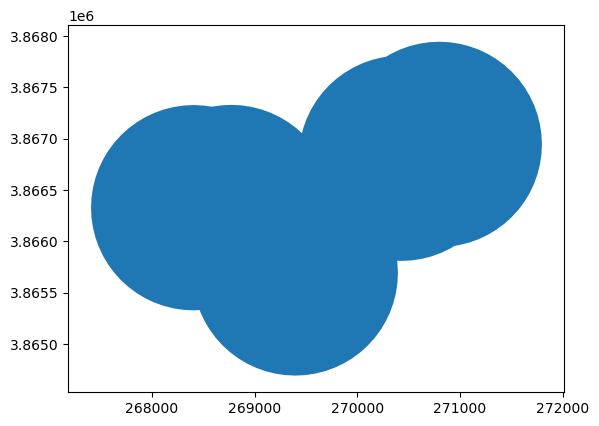

In [25]:
# First we set the geometry column of the gdf to be the buffered polygons instead of the points
gdf_slo_subset = gdf_slo.iloc[:5, :]
gdf_slo_subset.loc[:, "geometry"] = gdf_slo_subset.buffer(1000)
gdf_slo_subset.plot()

In [26]:
gdf_slo_subset.head()

STN_ID           SITE_CODE            SWN WELL_NAME  LATITUDE  \
14732   14515  349075N1195236W001  10N25W35F001S       NaN   34.9075   
14834   32411  349130N1195350W001  10N25W27R001S       NaN   34.9130   
14835   38827  349131N1195309W001  10N25W27R002S       NaN   34.9131   
14924   14511  349178N1195134W001  10N25W25M003S       NaN   34.9178   
14942   32409  349191N1195092W001  10N25W25M004S       NaN   34.9191   

       LONGITUDE WLM_METHOD  WLM_ACC BASIN_CODE     BASIN_NAME  \
14732   -119.524    Unknown  Unknown      3-013  Cuyama Valley   
14834   -119.535    Unknown  Unknown      3-013  Cuyama Valley   
14835   -119.531    Unknown  Unknown      3-013  Cuyama Valley   
14924   -119.513    Unknown  Unknown      3-013  Cuyama Valley   
14942   -119.509    Unknown  Unknown      3-013  Cuyama Valley   

           COUNTY_NAME  WELL_DEPTH WELL_USE WELL_TYPE WCR_NO  ZIP_CODE  \
14732  San Luis Obispo         NaN  Unknown   Unknown    NaN     92154   
14834  San Luis Obispo         NaN  Unknown   Unknown    NaN     92154   
14835  San Luis Obispo         NaN  Unknown   Unknown    NaN     92154   
14924  San Luis Obispo         NaN  Unknown   Unknown    NaN     92154   
14942  San Luis Obispo         NaN  Unknown   Unknown    NaN     92154   

                                                geometry  dist_from_stn_1  
14732  POLYGON ((270395.988 3865693.001, 270391.173 3...    215821.092758  
14834  POLYGON ((269406.21 3866328.542, 269401.395 38...    214666.454544  
14835  POLYGON ((269772.007 3866330.38, 269767.192 38...    215005.755313  
14924  POLYGON ((271429.923 3866810.295, 271425.107 3...    216372.474901  
14942  POLYGON ((271799.033 3866945.332, 271794.218 3...    216667.216124

<Axes: >

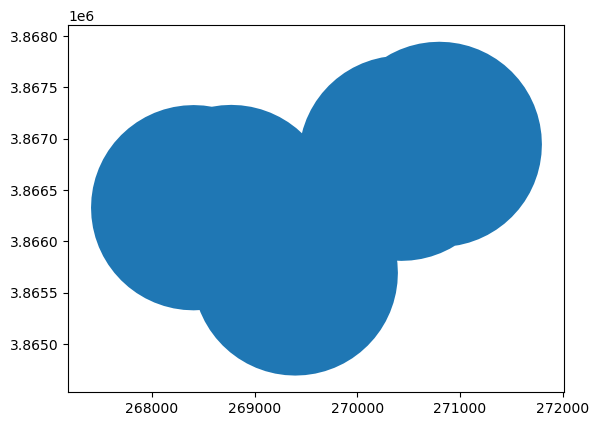

In [27]:
gdf_slo_subset.dissolve().plot()

In [28]:
# Notice that there is only one row in the gdf after performing the dissolve
# values are inherited from the first row, but the geometry is the unary_union of all geometryes
gdf_slo_subset.dissolve().head()

geometry  STN_ID  \
0  POLYGON ((270376.773 3865497.911, 270352.928 3...   14515   

            SITE_CODE            SWN WELL_NAME  LATITUDE  LONGITUDE  \
0  349075N1195236W001  10N25W35F001S      None   34.9075   -119.524   

  WLM_METHOD  WLM_ACC BASIN_CODE     BASIN_NAME      COUNTY_NAME  WELL_DEPTH  \
0    Unknown  Unknown      3-013  Cuyama Valley  San Luis Obispo         NaN   

  WELL_USE WELL_TYPE WCR_NO  ZIP_CODE  dist_from_stn_1  
0  Unknown   Unknown   None     92154    215821.092758

### Spatial Joins, Queries, and Relations

#### Intersections
To check for spatial intersection between two geographic datasets, we can use the `intersection` function: 

<Axes: >

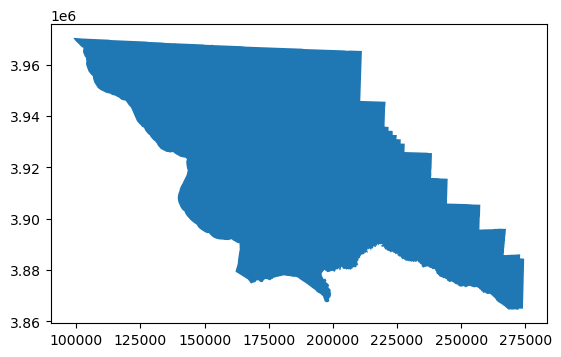

In [29]:
# Check which wells intersect with SLO's geometry
gdf_slo = gdf_counties[gdf_counties["name"] == "San Luis Obispo"].to_crs(gdf_counties.estimate_utm_crs())

gdf_slo.plot()

In [30]:
slo_co_stns = gpd.overlay(gdf_stns, gdf_slo, how="intersection")

<Axes: >

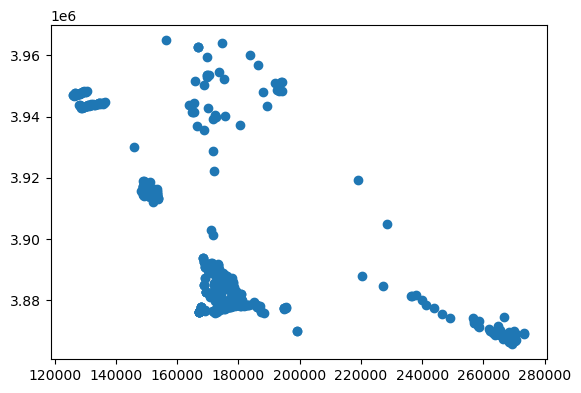

In [31]:
slo_co_stns.plot()

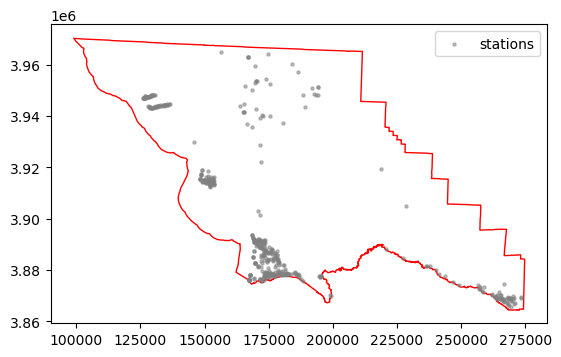

In [32]:
ax = gdf_slo.plot(color="white", edgecolor="red")
slo_co_stns.plot(alpha=0.5, markersize=5, color="gray", label="stations", ax=ax)
ax.legend()

### Exercise

1. Determine how many "Industrial", "Irrigation", and "Observation" Wells are in SLO County
2. Create a basic map showing each category as a different color

## Rasterio

Rasterio is a powerful library for working with [raster data](https://en.wikipedia.org/wiki/Raster_graphics) (think: images or grids of numbers with pixels) written on top of the Geospatial Data Abstraction Library [(GDAL)](https://gdal.org/), that makes it easy to perform a wide variety of raster processing and visualization tasks. 

### Reading and inspecting data 

We can open geospatial raster datasets (e.g. `.tif` and `.tiff` files) using the `.open` function:

In [33]:
import rasterio as rio

# raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
raster_path = "./data/dem_90m.tif"
src = rio.open(raster_path)
print(src)

<open DatasetReader name='./data/dem_90m.tif' mode='r'>


Notice that we are reading a file from a URL here, but this function works identically for local files. 

Once a dataset has been opened, we can inspect lots of useful information, including:
* Projection information
* Bounding box
* Spatial resolution
* Dimensions - width / height
* Other metadata

In [34]:
# Inspect crs
src.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [35]:
# Get the EPSG code of the CRS
src.crs.to_epsg()

3857

In [36]:
# Inspect metadata
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

Discussion: What do the `dtype`, `count`, and `nodata` values in the `src.meta` dict mean? 

In [37]:
# Inspect spatial res
src.res

(90.0, 89.99579177642138)

In [38]:
# Inspect dimensions or width / height
print(src.shape, src.width, src.height)

(3113, 4269) 4269 3113


In [39]:
# Inspect bounding box
src.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

### Plotting and visualizing

We can use the `read` function to read raster bands from `.tiff` or `.tif` files as `numpy` arrays, and then make use the `imshow` function from the trusty module `matplotlib`! 

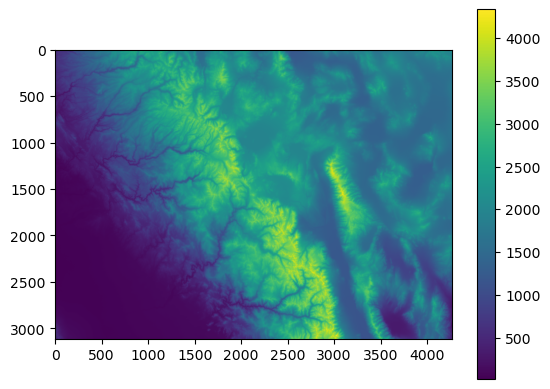

In [40]:
import numpy as np
import matplotlib.pyplot as plt

arr = src.read(1)
plt.imshow(arr)
plt.colorbar()

In the above code, we are reading the first band from the raster using `src.read(1)`. For multiband rasters, we can read the other bands using the same syntax. 

Note that **this method does not preserve any projection information in the plot** - the x and y axes are just the number of rows / cols in the dataset. 

If we want to preserve any geospatial coordinate information, we can use the rasterio plotting module:

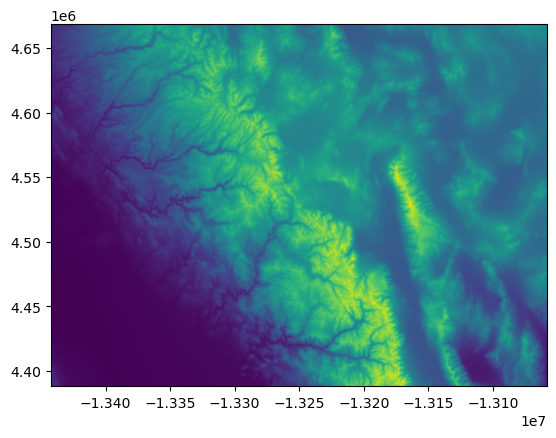

<Axes: >

In [41]:
import rasterio.plot

rio.plot.show(src)

### Exercise 
* set all values in raster less than 500 equal to np.nan
* Set all values greater than 1000 to np.nan 
* Calculate the mean of the remaining raster cells 
* Hint - inspect the data type of the array using the `arr.dtype` syntax, and convert as needed

#### Formatting Plots

We can leverage [matplotlib's functionality](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html) to style our plots, including adding titles and choosing colormaps:

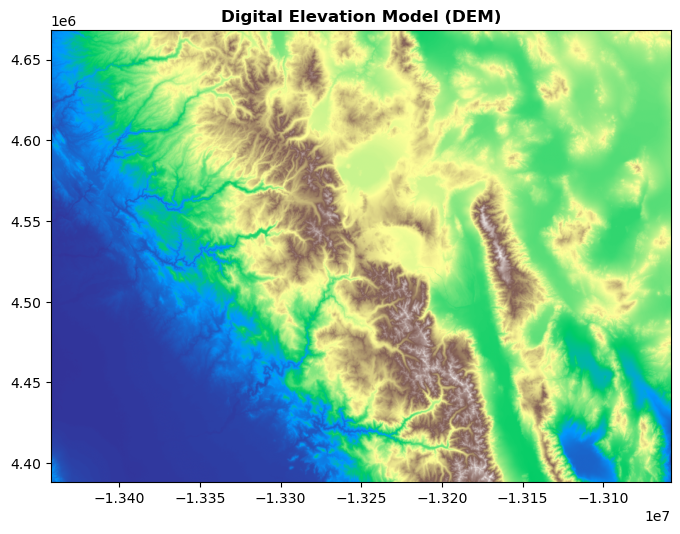

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

#### Plotting vector and raster data

In [43]:
Tuolumne_co = gdf_counties[
    gdf_counties["name"] == "Tuolumne"
].copy()  # We need to make a copy of this object to avoid a SettingWithCopyWarning
Tuolumne_co.to_crs(src.crs, inplace=True)

<Axes: title={'center': 'Digital Elevation Model (DEM) and Tuolumne co'}>

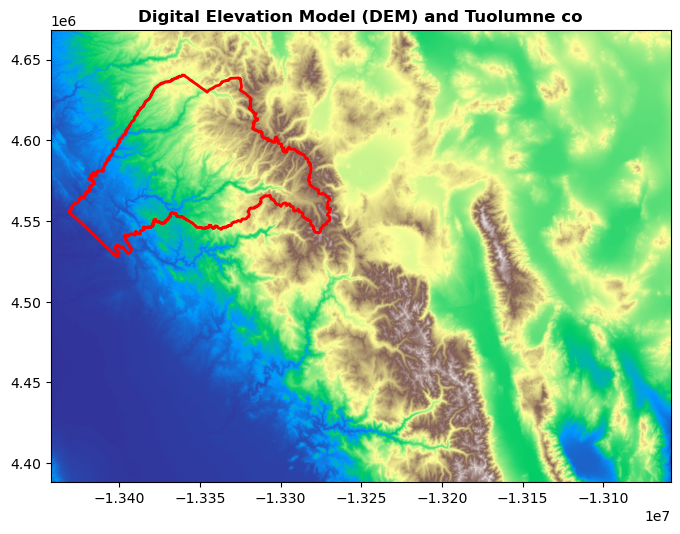

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) and Tuolumne co")
Tuolumne_co.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)

### Clipping raster to vector data

A common task involves clipping a raster to a vector dataset. We can use `rasterio.mask` to clip the DEM above to the boundary of Tuolumne county, defined in the `ca_counties.geojson` file: 

In [45]:
import rasterio.mask

# Read raster
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
raster_path = "./data/dem_90m.tif"

src = rio.open(raster_path)

# Read shape, isolate Tuolumne
shp_geom = gpd.read_file("ca_counties.geojson")
Tuolumne_co = shp_geom[shp_geom["name"] == "Tuolumne"].copy()  # We need to make a copy of this object to avoid a SettingWithCopyWarning

# Ensure CRS are consistent
Tuolumne_co.to_crs(src.crs, inplace=True)

# Perform clip
out_image, out_transform = rio.mask.mask(src, Tuolumne_co["geometry"], crop=True)

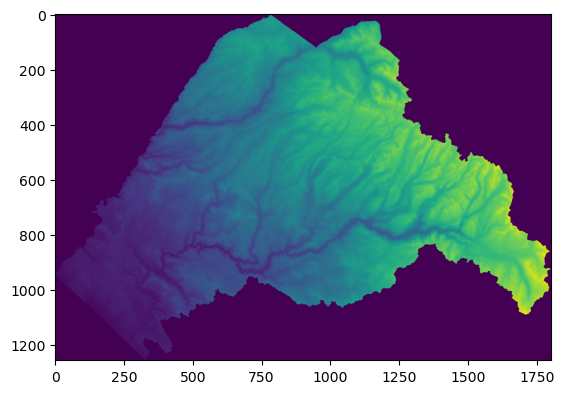

In [46]:
# Verify results:

rasterio.plot.show(out_image[0, :, :]);

Notice that rasterio returns by default an array with 3 dimensions (`out_image`), for which we have selected the first band manually. This functionality exists to deal with multiband rasters. 

### Writing rasters

Let's save the raster we just clipped

In [47]:
# Set the output file
output_raster_path = "./data/clipped.tif"

# Extract some information from the image we processed
kwargs = src.meta
kwargs.update(height=out_image.shape[1], width=out_image.shape[2], count=out_image.shape[0], dtype=out_image.dtype, crs=src.crs)

# Save
with rasterio.open(output_raster_path, "w", **kwargs) as dst:
    dst.write(out_image)

print(f"Raster data has been written to {output_raster_path}")

Raster data has been written to ./data/clipped.tif


### Reprojecting Rasters

We use the `rasterio.warp` module to change raster projections. 

Let's reproject our clipped raster to the WGS 84 (EPSG:3857) CRS and save the reprojected raster to a new file.

In [48]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Set output filename
raster_path = "./data/clipped.tif"
dst_crs = "EPSG:4326"  # WGS 84
output_reprojected_path = "./data/clipped_reprojected.tif"

with rasterio.open(raster_path) as src:
    transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)

    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )
print(f"Reprojected raster saved at {output_reprojected_path}")

Reprojected raster saved at ./data/clipped_reprojected.tif


### Multiband Rasters 

Satellite data is generally composed of a number of [spectral bands](https://landsat.gsfc.nasa.gov/satellites/landsat-8/landsat-8-bands/). Each band measures the light reflected between two wavelengths (hence the term 'band'). Rasterio allows us to work with these bands individually and in concert. 

For example, NASA's Landsat Satellites record the following bands: 

| Name   | Wavelength       | Description                                        |
|--------|------------------|----------------------------------------------------|
| SR_B1  | 0.435-0.451 μm   | Band 1 (ultra blue, coastal aerosol) surface reflectance |
| SR_B2  | 0.452-0.512 μm   | Band 2 (blue) surface reflectance                   |
| SR_B3  | 0.533-0.590 μm   | Band 3 (green) surface reflectance                  |
| SR_B4  | 0.636-0.673 μm   | Band 4 (red) surface reflectance                    |
| SR_B5  | 0.851-0.879 μm   | Band 5 (near infrared) surface reflectance          |
| SR_B6  | 1.566-1.651 μm   | Band 6 (shortwave infrared 1) surface reflectance   |
| SR_B7  | 2.107-2.294 μm   | Band 7 (shortwave infrared 2) surface reflectance   |

Let's plot all the bands in this raster

In [49]:
# Read multiband Landsat image:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
# raster_path = "./data/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)
print(src)

# Specify band names:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif' mode='r'>


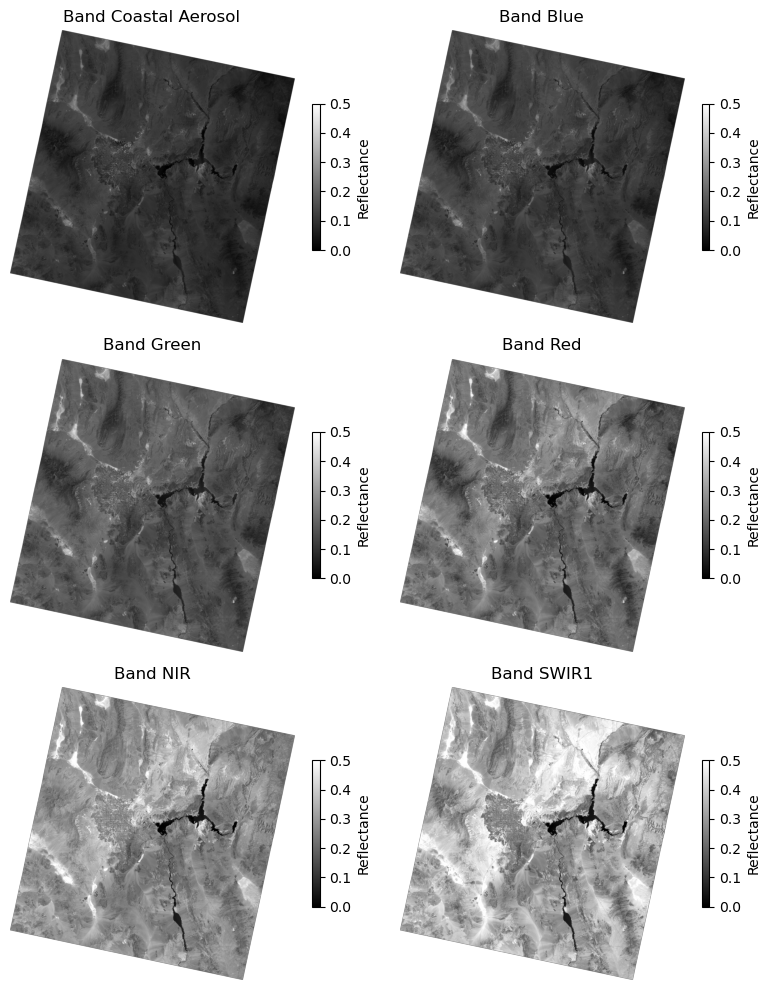

In [50]:
# Plot raster:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
    data = src.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band - 1]}")
    ax.axis("off")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

### True color image

In order to visualize a true color image, we need to visualize band 2 (blue), band 3 (green), and band 4 (red) in the same image: 

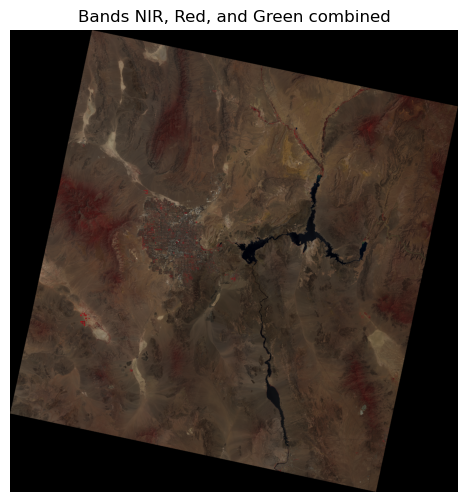

In [51]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.axis("off")
plt.title("Bands NIR, Red, and Green combined")
plt.show()

In [52]:
src.nodata

-inf

#### Band math: Calculating NDVI 

A common metric that we can derive from multiple bands is [Normalized Difference Vegetation Index (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index), which is defined as: 

$$NDVI = (NIR - Red) / (NIR + Red)$$

In [53]:
# NDVI Calculation: NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)

/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_25758/134765836.py:2: RuntimeWarning: invalid value encountered in subtract
  ndvi = (nir_band - red_band) / (nir_band + red_band)


We received a `RuntimeWarning` about invalid values in our subtract operation. This is likely due to the 'no data' areas denoted by the black pixels in the true color image above. We can read the nodata value directly from `rasterio` and use numpy to change the nodata values in order to fix this issue: 

In [54]:
# Set the nodata value to numpy nan for each of the bands
nir_band[nir_band == src.nodata] = np.nan
red_band[red_band == src.nodata] = np.nan

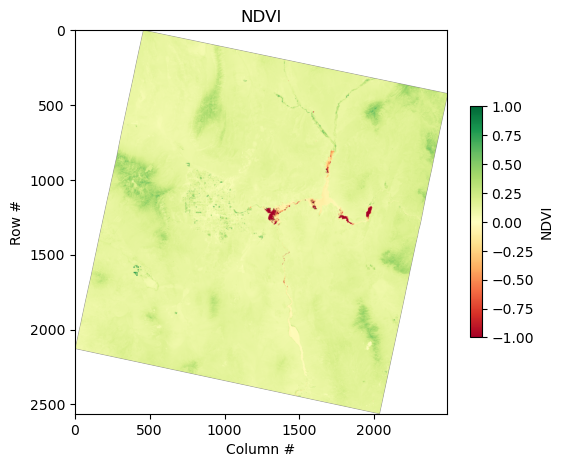

In [55]:
# NDVI Calculation: NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(6, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## Xarray

Xarray makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun!

Xarray extends NumPy functionality by providing data structures specifically for geospatial multi-dimensional arrays:

    DataArray: A labeled, multi-dimensional array, which includes dimensions, coordinates, and attributes.

    Dataset: A collection of DataArray objects that share the same dimensions.


### Xarray data representation
Xarray represents stacks of images as 'cubes', where two axes represent the latitude and longitude coordinates of spatial data, and a third axis represents time. Note that an xarray dataset can contain more than one variable! 

The schematic below shows examples for temperature and precipitation

![xarray](./img/5-xarray.png)

### Loading Data and inspecting attributes

This data was downloaded from NOAA: https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html 

In [56]:
import xarray as xr

ds = xr.open_dataset("./data/runof.sfc.mon.mean.nc")
ds

<xarray.Dataset> Size: 67MB
Dimensions:  (lat: 94, lon: 192, time: 923)
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2024-11-01
Data variables:
    runof    (time, lat, lon) float32 67MB ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:58:07 1999: ncrcat runof.mon.mean.nc /Datas...
    title:          monthly mean runof.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

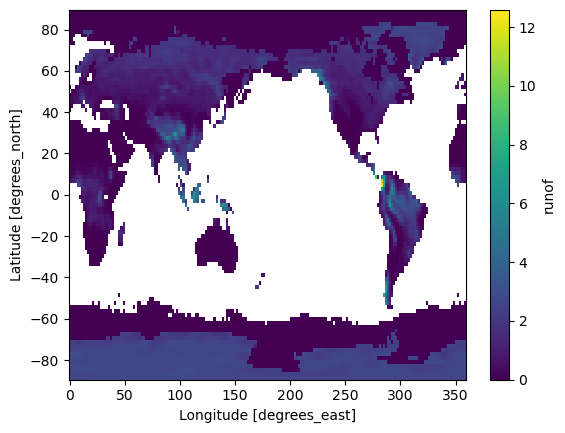

In [57]:
ds["runof"].mean(dim="time").plot()

In [58]:
# Select the data array describing runoff
ro = ds["runof"]

In [59]:
# Plot some of the data array attributes

# Obtain a numpy array of the values
print(ro.values.shape)
print(ro.values)

(923, 94, 192)
[[[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [1.1632297 1.1696817 1.1729066 ... 1.1600037 1.1600037 1.1600037]
  [1.1600037 1.1600037 1.1600037 ... 1.1600037 1.1600037 1.1600037]
  [1.1729066 1.1761327 1.1790358 ... 1.1696817 1.1696817 1.1729066]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  ...
  [1.5599976 1.5599976 1.5599976 ... 1.4944816 1.5186188 1.5427573]
  [1.5389636 1.5389636 1.5389636 ... 1.5358603 1.5358603 1.5389636]
  [1.5599976 1.5599976 1.5599976 ... 1.5599976 1.5599976 1.5599976]]

 [[      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan     

In [60]:
print(ro.coords)

Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2024-11-01


In [61]:
print(ro.attrs)

{'long_name': 'Monthly Mean of Water Runoff', 'valid_range': array([-400.,  700.], dtype=float32), 'units': 'kg/m^2', 'precision': np.int16(1), 'var_desc': 'Water Runoff', 'level_desc': 'Surface', 'statistic': 'Mean', 'parent_stat': 'Individual Obs', 'dataset': 'NCEP Reanalysis Derived Products', 'actual_range': array([-5.e+00,  1.e+30], dtype=float32)}


In [62]:
print(ro.dims)

('time', 'lat', 'lon')


### Filtering and subsetting

We can easily select data based on dimension labels, which is very intuitive when working with geospatial data.

In [63]:
# Select data for a specific time and location
selected_data = ro.sel(time="2000-01-01", lat=40.0, lon=120.0, method="nearest")
selected_data

<xarray.DataArray 'runof' ()> Size: 4B
array(1.587088, dtype=float32)
Coordinates:
    lat      float32 4B 40.95
    lon      float32 4B 120.0
    time     datetime64[ns] 8B 2000-01-01
Attributes:
    long_name:     Monthly Mean of Water Runoff
    valid_range:   [-400.  700.]
    units:         kg/m^2
    precision:     1
    var_desc:      Water Runoff
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-5.e+00  1.e+30]

In [64]:
# Slice data across a range of times
time_slice = ro.sel(time=slice("2013-01-01", "2013-01-31"))
time_slice

<xarray.DataArray 'runof' (time: 1, lat: 94, lon: 192)> Size: 72kB
array([[[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [2.580681, 2.590358, ..., 2.567777, 2.574229],
        [2.800049, 2.800049, ..., 2.800049, 2.800049]]],
      shape=(1, 94, 192), dtype=float32)
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     Monthly Mean of Water Runoff
    valid_range:   [-400.  700.]
    units:         kg/m^2
    precision:     1
    var_desc:      Water Runoff
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-5.e+00  1.e+30]

In [65]:
# Calculate the mean SWE over time
mean_ro = ro.mean(dim="time")
mean_ro

<xarray.DataArray 'runof' (lat: 94, lon: 192)> Size: 72kB
array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [2.635003 , 2.6681736, 2.7444425, ..., 2.6152654, 2.6228926,
        2.6288702],
       [2.6165829, 2.6178818, 2.6189005, ..., 2.6109586, 2.6131048,
        2.6150517],
       [2.6433473, 2.6445358, 2.645743 , ..., 2.6407027, 2.641557 ,
        2.6424491]], shape=(94, 192), dtype=float32)
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1

### Plotting and visualization

Xarray provides builtin plotting methods that can be readily modified and integrated with standard `matplotlib` syntax

Text(0.5, 1.0, 'Mean Monthly Runoff')

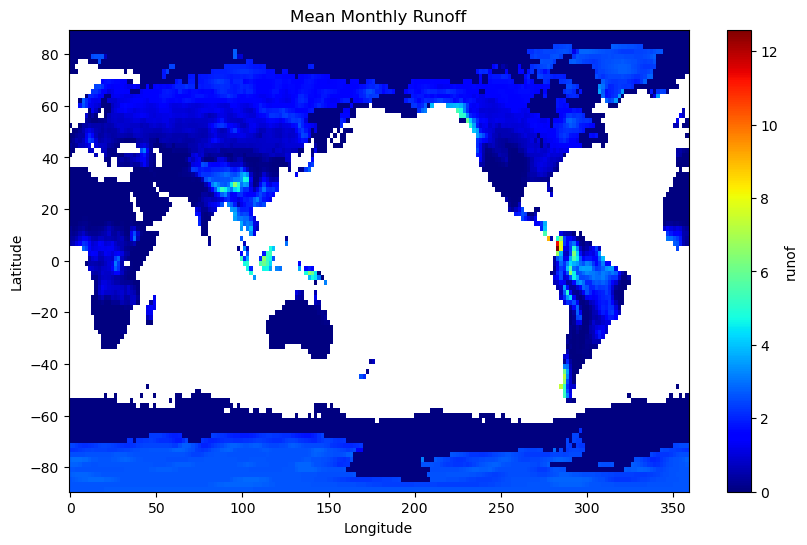

In [66]:
mean_ro.plot(cmap="jet", figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Monthly Runoff")

We can use the `.isel` method to select a spatial subset of the data by index:

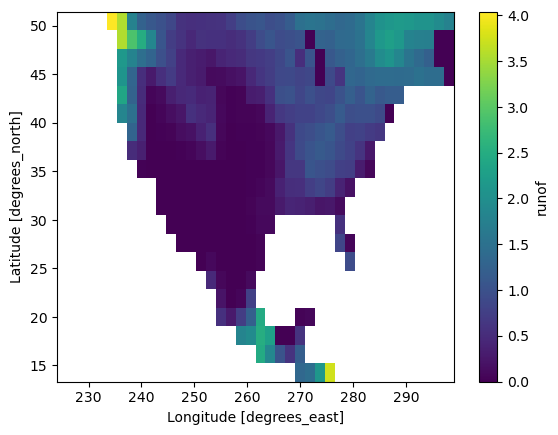

In [67]:
cropped_ds = mean_ro.isel(lat=slice(20, 40), lon=slice(120, 160))
cropped_ds.plot()

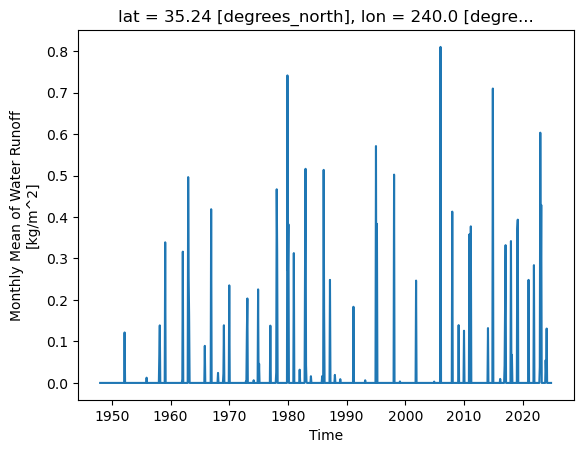

In [68]:
# Plot a time series for a specific location
ro.sel(lat=35.0, lon=240, method="nearest").plot()
plt.show()

## GDAL

The Geospatial Data Abstraction Library [(GDAL)](https://en.wikipedia.org/wiki/GDAL) is the magical piece of open source software that underlies all of the above libraries. 

While GDAL has [python bindings](https://gdal.org/en/stable/api/python_bindings.html), the syntax are more complicated and less user friendly than the above libraries. Thus, coverage of GDAL syntax explicitly is outside the scope of this course. 

For large batch, big data, or highly custom processing tasks, GDAL has a large array of command-line utilities (see [here](https://gdal.org/en/stable/programs)) that can be deployed via the Anaconda Prompt command line that was introduced in module 1. 